# Plot utilities

> A set of convenience functions for plotting code

In [ ]:
#| default_exp plot_utils

In [ ]:
#| export
import fastcore.test
import matplotlib as mpl
import matplotlib.pyplot as plt
from nbdev.showdoc import *
import nptyping
import numpy as np
import pandas
import plotly.graph_objects as go

In [ ]:
#| export
def plot_strategy_distribution(data, # The dataset containing data on parameters and the strategy distribution
                               strategy_set, # The strategies to plot from the dataset
                               x="pr", # The parameter to place on the x-axis of the plot
                               x_label='Risk of an AI disaster, pr', # the x-axis label
                               title='Strategy distribution', # the plot title
                               ) -> None:
    """Plot the strategy distribution as we vary `x`."""

    fig, ax = plt.subplots()
    ax.stackplot(data[x],
                 [data[strategy + "_frequency"] for strategy in strategy_set],
                 labels=strategy_set,
                 alpha=0.8)
    ax.legend(loc='upper left')
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel('Proportion')

    # Add threshold boundaries to convey dilemma region
    plt.vlines([data['threshold_society_prefers_safety'].values[0],
                data['threshold_risk_dominant_safety'].values[0]],
               0,
               0.995,
               colors=['C2', 'C3'],
               linewidth=3)

In [ ]:
#| export
def plot_heatmap(table, # A pivot table, created using `pandas.pivot` function
                 figure_object=None,
                 xlabel="x",
                 ylabel="y",
                 zlabel="z",
                 cmap='inferno',
                 zmin=0,
                 zmax=1,
                ):
    """Plot heatmap using the index, columns, and values from `table`."""
    if figure_object==None:
        heatmap, ax = plt.subplots()
    else:
        heatmap, ax = figure_object
    im = ax.imshow(table.values,
                   cmap=cmap,
                   extent=[table.columns.min(),
                           table.columns.max(),
                           table.index.min(),
                           table.index.max()],
                   vmin=zmin,
                   vmax=zmax,
                   interpolation='nearest',
                   origin='lower',
                   aspect='auto')
    ax.set(xlabel=xlabel,
           ylabel=ylabel)

    cbar = heatmap.colorbar(im)
    cbar.ax.set_ylabel(zlabel)
    return heatmap, ax

3D quiver plot

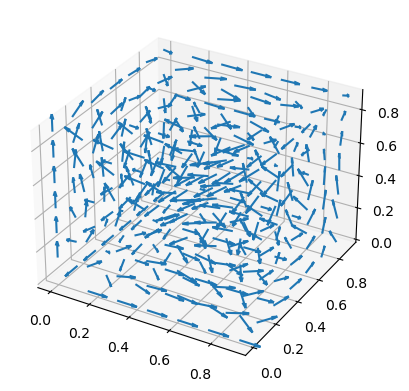

In [ ]:
ax = plt.figure().add_subplot(projection='3d')

# Make the grid
x, y, z = np.meshgrid(np.arange(0, 1, 0.15),
                      np.arange(0, 1, 0.15),
                      np.arange(0, 1, 0.15))

# Make the direction data for the arrows
u = np.sin(np.pi * x) * np.cos(np.pi * y) * np.cos(np.pi * z)
v = -np.cos(np.pi * x) * np.sin(np.pi * y) * np.cos(np.pi * z)
w = (np.sqrt(2.0 / 3.0) * np.cos(np.pi * x) * np.cos(np.pi * y) *
     np.sin(np.pi * z))

ax.quiver(x, y, z, u, v, w, length=0.1, normalize=True)
plt.show()

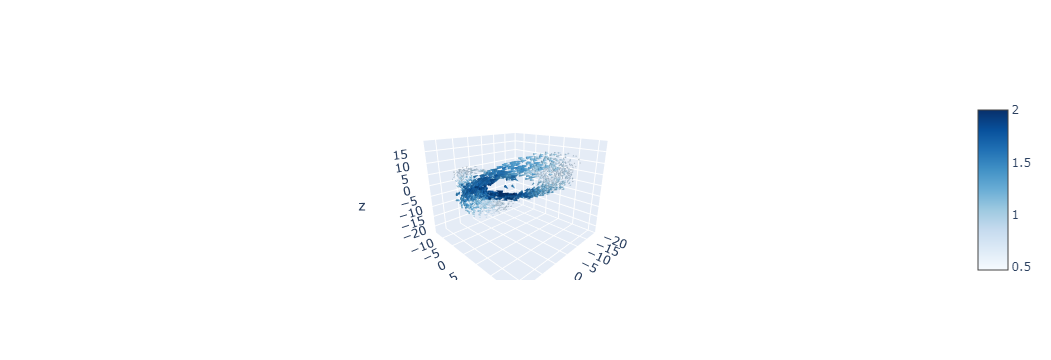

In [ ]:
df = pandas.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/vortex.csv")

fig = go.Figure(data = go.Cone(
    x=df['x'],
    y=df['y'],
    z=df['z'],
    u=df['u'],
    v=df['v'],
    w=df['w'],
    colorscale='Blues',
    sizemode="absolute",
    sizeref=40))

fig.update_layout(scene=dict(aspectratio=dict(x=1, y=1, z=0.8),
                             camera_eye=dict(x=1.2, y=1.2, z=0.6)))

fig.show()

In [ ]:
def payoffs_encanacao_2016(models):
    names = ['b_r', 'b_s', 'c_s', 'c_t', 'σ']
    b_r, b_s, c_s, c_t, σ = [models[k] for k in names]
    payoffs = {}
    n_players = 3
    n_sectors = 3
    n_strategies_per_sector = [2, 2, 2]
    n_strategies_total = 6
    index_min = "0-0-0" # All players are from the first sector, playing that sector's first strategy
    index_max = "5-5-5" # All players are from the third sector, playing that sector's second strategy
    # Note: The seperator makes it easy to represent games where n_strategies_total >= 10.
    
    # It is also trivial to define a vector which maps these indexes to strategy profiles
    # As sector order is fixed we could neglect to mention suscripts for each sector
    strategy_names = ["D", "C", "D", "C", "D", "C"]
    
    zero = np.zeros(b_r.shape[0])
    # As in the main text
    payoffs["C-C-C"] = {"P3": b_r-2*c_s,
                        "P2": σ+b_s-c_t,
                        "P1": σ+b_s}
    payoffs["C-C-D"] = {"P3": -c_s,
                        "P2": b_s-c_t,
                        "P1": zero}
    payoffs["C-D-C"] = {"P3": b_r-c_s,
                        "P2": zero,
                        "P1": b_s}
    payoffs["C-D-D"] = {"P3": zero,
                        "P2": σ,
                        "P1": σ}
    payoffs["D-C-C"] = {"P3": zero,
                        "P2": σ-c_t,
                        "P1": σ}
    payoffs["D-C-D"] = {"P3": zero,
                        "P2": -c_t,
                        "P1": zero}
    payoffs["D-D-C"] = {"P3": zero,
                        "P2": zero,
                        "P1": zero}
    payoffs["D-D-D"] = {"P3": zero,
                        "P2": σ,
                        "P1": σ}
    
    # The following indexes capture all strategy profiles where each player is fixed to a unique sector
    # (and player order does not matter, so we need only consider one ordering of sectors).
    payoffs["4-2-0"] = payoffs["D-D-D"]
    payoffs["4-2-1"] = payoffs["D-D-C"]
    payoffs["4-3-0"] = payoffs["D-C-D"]
    payoffs["4-3-1"] = payoffs["D-C-C"]
    payoffs["5-2-0"] = payoffs["C-D-D"]
    payoffs["5-2-1"] = payoffs["C-D-C"]
    payoffs["5-3-0"] = payoffs["C-C-D"]
    payoffs["5-3-1"] = payoffs["C-C-C"]
    return {**models, "payoffs": payoffs}

In [ ]:
def gos_encanacao_2016(models):
    payoffs = models['payoffs']
    x,y,z = models['current_state']
    Z1, Z2, Z3 = models['Z']
    β = models['β']
    μ = models['μ']
    fitness_C1 = (y*z*payoffs["C-C-C"]["P1"]
                  + (1-y)*z*payoffs["C-D-C"]["P1"]
                  + y*(1-z)*payoffs["D-C-C"]["P1"]
                  + (1-y)*(1-z)*payoffs["D-D-C"]["P1"])
    fitness_D1 = (y*z*payoffs["C-C-D"]["P1"]
                  + (1-y)*z*payoffs["D-D-D"]["P1"]
                  + y*(1-z)*payoffs["D-C-D"]["P1"]
                  + (1-y)*(1-z)*payoffs["D-D-D"]["P1"])
    fitness_C2 = (x*z*payoffs["C-C-C"]["P2"]
                  + (1-x)*z*payoffs["C-C-D"]["P2"]
                  + x*(1-z)*payoffs["D-C-C"]["P2"]
                  + (1-x)*(1-z)*payoffs["D-C-D"]["P2"])
    fitness_D2 = (x*z*payoffs["C-D-C"]["P2"]
                  + (1-x)*z*payoffs["C-D-D"]["P2"]
                  + x*(1-z)*payoffs["D-D-C"]["P2"]
                  + (1-x)*(1-z)*payoffs["D-D-D"]["P2"]) 
    fitness_C3 = (x*y*payoffs["C-C-C"]["P3"]
                  + (1-x)*y*payoffs["C-C-D"]["P3"]
                  + x*(1-y)*payoffs["C-D-C"]["P3"]
                  + (1-x)*(1-y)*payoffs["C-D-D"]["P3"])
    fitness_D3 = (x*y*payoffs["D-C-C"]["P3"]
                  + (1-x)*y*payoffs["D-C-D"]["P3"]
                  + x*(1-y)*payoffs["D-D-C"]["P3"]
                  + (1-x)*(1-y)*payoffs["D-D-D"]["P3"])
    
    g1 = (np.tanh(β*(fitness_C1 - fitness_D1)/2) * (1 - x) * x
          + μ * (1 - 2*x))
    g2 = (np.tanh(β*(fitness_C2 - fitness_D2)/2) * (1 - y) * y
          + μ * (1 - 2*y))
    g3 = (np.tanh(β*(fitness_C3 - fitness_D3)/2) * (1 - z) * z
          + μ * (1 - 2*z))
    models['u'] = g1
    models['v'] = g2
    models['w'] = g3
    models['gos'] = [g1, g2, g3]
    return models
    

In [ ]:
from gh_pages_example.utils import *

In [ ]:
models = model_builder({"b_r": 0.8,
               "b_s": 0.4,
               "c_s": 0.15,
               "c_t": 0.15,
               "σ": 0.2,
               "x": np.arange(0, 1, 0.2),
               "y": np.arange(0, 1, 0.2),
               "z": np.arange(0, 1, 0.2),})
models['current_state'] = [models['x'], models['y'], models['z']]
models = {**models, "Z": [50, 50, 50], "β": 2.5, "μ": 0.02}

In [ ]:
results =  thread_macro(models,
                        payoffs_encanacao_2016,
                        gos_encanacao_2016,
                       )

In [ ]:
results['gos']

[array([ 0.02      ,  0.02      ,  0.02      ,  0.02      ,  0.02      ,
         0.02      ,  0.02      ,  0.02      ,  0.02      ,  0.02      ,
         0.02      ,  0.02      ,  0.02      ,  0.02      ,  0.02      ,
         0.02      ,  0.02      ,  0.02      ,  0.02      ,  0.02      ,
         0.02      ,  0.02      ,  0.02      ,  0.02      ,  0.02      ,
        -0.02718699, -0.01182161,  0.00400666,  0.01999334,  0.03582161,
        -0.01182161,  0.00400666,  0.01999334,  0.03582161,  0.05118699,
         0.00400666,  0.01999334,  0.03582161,  0.05118699,  0.06582009,
         0.01999334,  0.03582161,  0.05118699,  0.06582009,  0.07950384,
         0.03582161,  0.05118699,  0.06582009,  0.07950384,  0.09208323,
        -0.05478048, -0.03173241, -0.00799001,  0.01599001,  0.03973241,
        -0.03173241, -0.00799001,  0.01599001,  0.03973241,  0.06278048,
        -0.00799001,  0.01599001,  0.03973241,  0.06278048,  0.08473013,
         0.01599001,  0.03973241,  0.06278048,  0.0

In [ ]:
np.arange(0, 1, 0.2)

array([0. , 0.2, 0.4, 0.6, 0.8])

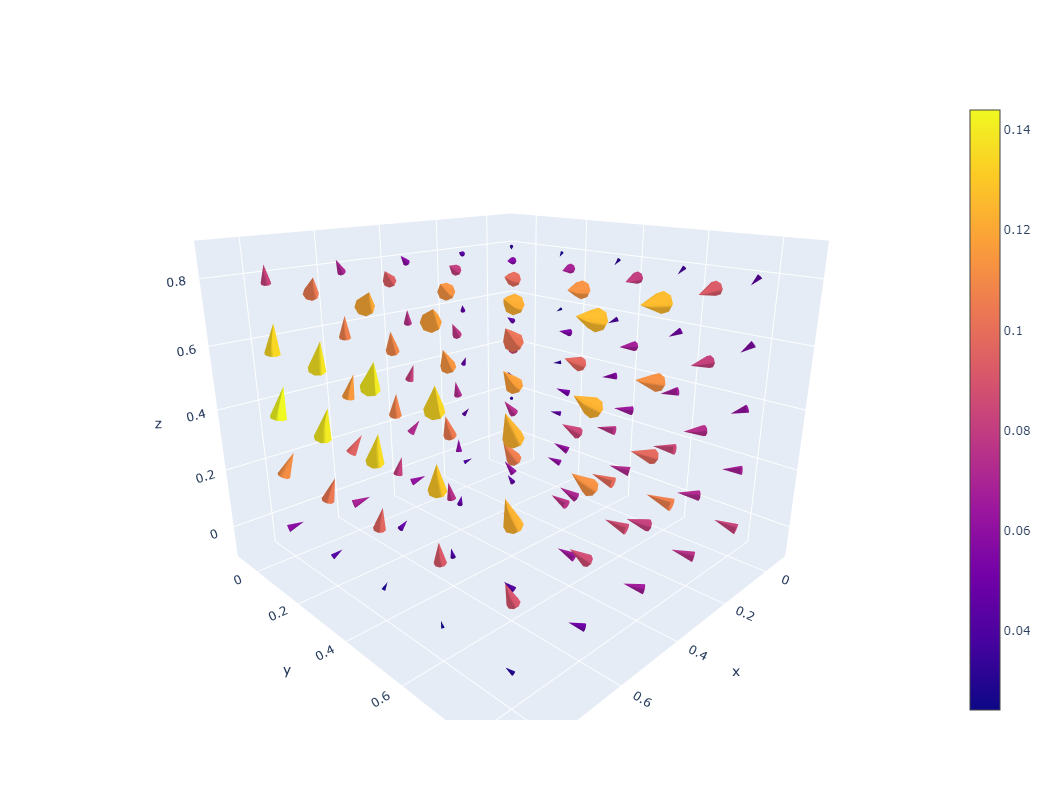

In [ ]:
fig = go.Figure(data = go.Cone(
    x=results['x'],
    y=results['y'],
    z=results['z'],
    u=results['u'],
    v=results['v'],
    w=results['w'],
    # colorscale='Reds',
    # sizemode="absolute",
    # sizeref=40
))

fig.update_layout(
    
    scene=dict(aspectratio=dict(x=1, y=1, z=0.8),
               camera_eye=dict(x=1.2, y=1.2, z=0.6)),
    height=800,
)

fig.show()

In [ ]:
df = pandas.DataFrame({k:v for k,v in results.items() if k in ["x", "y", "z", "u", "v", "w"]})

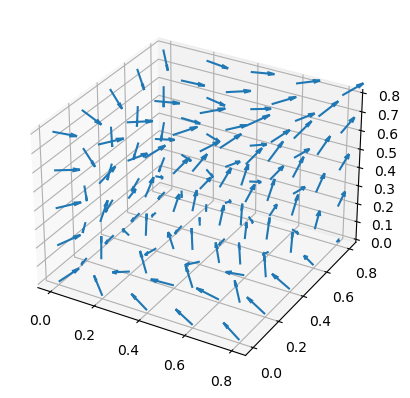

In [ ]:
ax = plt.figure().add_subplot(projection='3d')


x = results['x'].reshape((5, 5, 5))
y = results['y'].reshape((5, 5, 5))
z = results['z'].reshape((5, 5, 5))
u = results['u'].reshape((5, 5, 5))
v = results['v'].reshape((5, 5, 5))
w = results['w'].reshape((5, 5, 5))

ax.quiver(x, y, z, u, v, w, length=0.1, normalize=True)
plt.show()

In [ ]:
#| hide
import nbdev; nbdev.nbdev_export()